# 6409 Майборода Татьяна. Вариант 3. Лабораторная работа 1

1) Классификация данных методом k ближайших соседей ( kNN)

2) Классификация данных методом опорных векторов (SVM)

3) Построение softmax-классификатора

Вариант 1: задания 1 и 2 на наборе данных CIFAR-10

Вариант 2: задания 1 и 2 на наборе данных MNIST

Вариант 3: задания 1 и 3 на наборе данных CIFAR-10

Вариант 4: задания 1 и 3 на наборе данных MNIST

Лабораторные работы можно выполнять с использованием сервиса Google Colaboratory (https://medium.com/deep-learning-turkey/google-colab-free-gpu-tutorial-e113627b9f5d) или на локальном компьютере. 

## 1. Классификация данных методом k ближайших соседей ( kNN)

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

%pip install imageio

from scripts.data_utils import load_CIFAR10


%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\volce\appdata\local\programs\python\python311\lib\site-packages\dlib-19.24.99-py3.11-win-amd64.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..

[notice] A new release of pip is available: 23.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


1.1 Скачайте данные в соответсвии с заданием.

CIFAR-10 по ссылке https://www.cs.toronto.edu/~kriz/cifar.html
или используйте  команду !bash get_datasets.sh (google colab, local ubuntu)

MNIST 
sklearn.datasets import load_digits
digits = load_digits()

In [30]:
cifar10_dir = 'scripts/datasets/cifar-10-batches-py'

try:
    del X_train, y_train
    del X_test, y_test
    print('Clear previously loaded data.')
except:
    pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Clear previously loaded data.
Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


1.2 Выведите несколько примеров изображений из обучающей выборки для каждого класса.



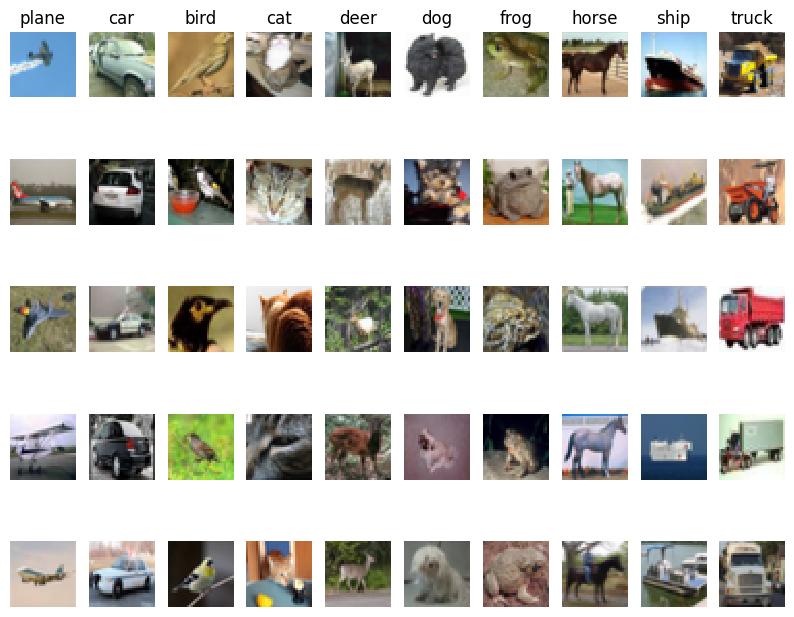

In [3]:
# Заведем названия столбцов
labels = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
labels_len = len(labels)
# Число картинок, которое выведется в столбце
n_samples = 5

# Формиурем рандомный набор изображений
for class_index, class_name in enumerate(labels):
    # Получаем список индексов для рандомных n_samples изображений
    class_indexes = np.random.choice(np.flatnonzero(y_train == class_index), n_samples, replace=False)
    # Пробегаемся по всем class_indexes и отрисовываем изображение в соответствующем столбце
    for i, idx in enumerate(class_indexes):
        plt_idx = i * labels_len + class_index + 1
        plt.subplot(n_samples, labels_len, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(class_name)
plt.show()

1.3 Разделите данные на обучающу и тестовую выборки (X_train, y_train, X_test, y_test). Преобразуйте каждое изображение в одномерный массив. 

In [31]:
# Разделяем данные на выборки. Размеры маоск взяты из scripts/data_utils.py. Только для тренировочной выборки уменьшена в 10 раз,
# потому что иначе граифки были узкие
num_train = 4900
mask = list(range(num_train))
knn_X_train = X_train[mask]
knn_y_train = y_train[mask]

num_test = 1000
mask = list(range(num_test))
knn_X_test = X_test[mask]
knn_y_test = y_test[mask]

# Переводим матрицы в одномерные массивы
knn_X_train = np.reshape(knn_X_train, (knn_X_train.shape[0], -1))
knn_y_train = np.reshape(knn_y_train, (knn_y_train.shape[0],))
knn_X_test = np.reshape(knn_X_test, (knn_X_test.shape[0], -1))
knn_y_test = np.reshape(knn_y_test, (knn_y_test.shape[0],))
print(knn_X_train.shape, knn_X_test.shape)

(4900, 3072) (1000, 3072)


1.4 Напишите реализацию классификатора в скрипте /classifiers/k_nearest_neighbor.py и обучите его на сформированной выборке. 

In [5]:
%pip install future
from scripts.classifiers import KNearestNeighbor

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\volce\appdata\local\programs\python\python311\lib\site-packages\dlib-19.24.99-py3.11-win-amd64.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..

[notice] A new release of pip is available: 23.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
classifier = KNearestNeighbor()
classifier.train(knn_X_train, knn_y_train)

1.5 Выполните классификацию на тестовой выборке

In [7]:
dists = classifier.compute_distances_two_loops(X_test)

1.6 Визуализируйте матрицу расстояний для каждого изображения из тестовой выборки до изображений из обучающей выборки. 


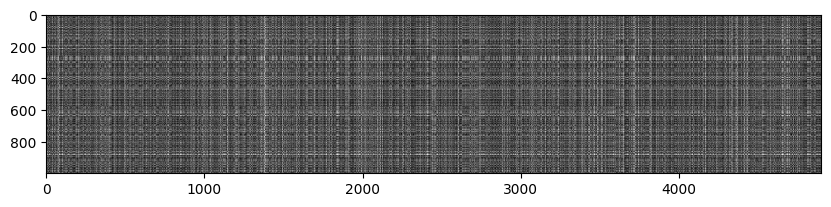

In [8]:
plt.imshow(dists, interpolation='none')
plt.show()


1.7 Посчитайте долю правильно классифицированных изображений из тестовой выборки.


In [25]:
def calculate_accuracy(y_predicted, y_test):
    return np.mean(y_predicted == y_test)

In [21]:
print (f'Доля правильно классифицированных: {calculate_accuracy(classifier.predict_labels(dists, k = 3), knn_y_test)}')

Доля правильно классифицированных: 0.261


1.8 Постройте график зависимости доли правильно классифицированных изображений от числа соседей, используемых при классификации.

In [77]:
# Заводим словарь, где ключ - количество соседей, а значение - точность классификации при соответствующем числе соседей
neighbors_accur = {2:0, 3:0, 4:0, 5:0, 10:0, 15:0, 20:0, 25:0, 30:0, 35:0, 40:0, 45:0, 50:0, 75:0, 100:0}

# Пробегаемся по каждому ключу и считаем для него точность
for k in neighbors_accur.keys():
    knn_classifier = KNearestNeighbor()
    knn_classifier.train(knn_X_train, knn_y_train)
    neighbors_accur[k] = calculate_accuracy(knn_classifier.predict(knn_X_test, k=k, num_loops=2), knn_y_test)
    print(f"Посчитали точность для k = {k}, она составила {neighbors_accur[k]}")
    
print(f"\nТочность для каждого из соседей: {neighbors_accur}")

Посчитали точность для k = 2, она составила 0.228
Посчитали точность для k = 3, она составила 0.261
Посчитали точность для k = 4, она составила 0.268
Посчитали точность для k = 5, она составила 0.264
Посчитали точность для k = 10, она составила 0.277
Посчитали точность для k = 15, она составила 0.271
Посчитали точность для k = 20, она составила 0.27
Посчитали точность для k = 25, она составила 0.273
Посчитали точность для k = 30, она составила 0.262
Посчитали точность для k = 35, она составила 0.258
Посчитали точность для k = 40, она составила 0.252
Посчитали точность для k = 45, она составила 0.26
Посчитали точность для k = 50, она составила 0.256
Посчитали точность для k = 75, она составила 0.235
Посчитали точность для k = 100, она составила 0.237

Точность для каждого из соседей: {2: 0.228, 3: 0.261, 4: 0.268, 5: 0.264, 10: 0.277, 15: 0.271, 20: 0.27, 25: 0.273, 30: 0.262, 35: 0.258, 40: 0.252, 45: 0.26, 50: 0.256, 75: 0.235, 100: 0.237}


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


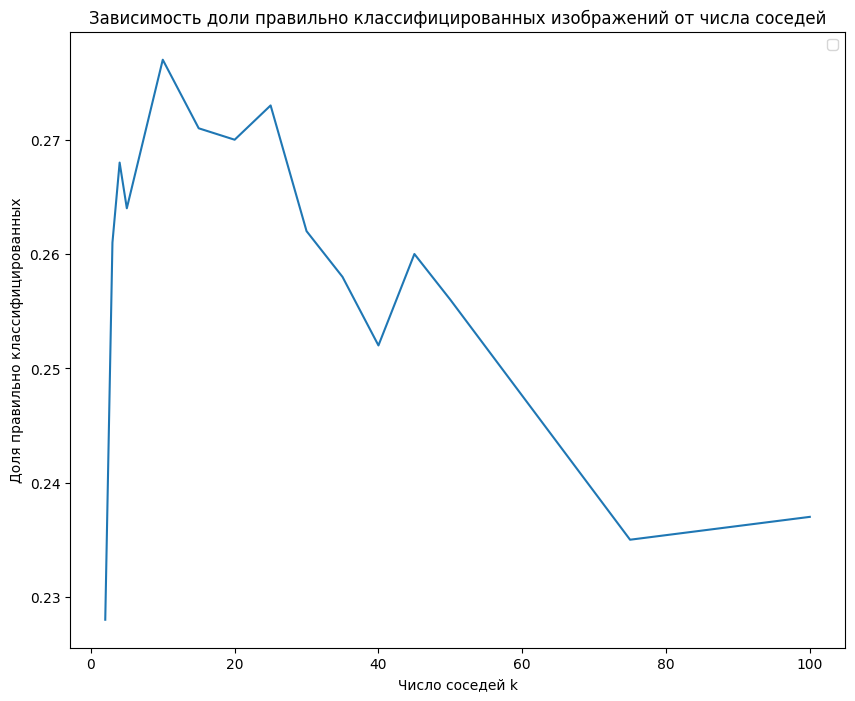

In [78]:
# Строим график зависиомсти
plt.title("Зависимость доли правильно классифицированных изображений от числа соседей")
plt.plot(neighbors_accur.keys(), neighbors_accur.values())
plt.legend()
plt.xlabel("Число соседей k")
plt.ylabel("Доля правильно классифицированных")
plt.show()

1.9 Выберите лучшее значение параметра k на основе кросс-валидации.


In [80]:
# Реализуем метод k-fold
def cross_val(X, y, classifier, params = None, train_params = None, k = 5):
    # Делим выборки на фолды
    X_folds = np.array_split(X, k)
    y_folds = np.array_split(y, k)
    
    results = []
    
    # Производим k итераций, во время каждой из которых один фолд выступает в роли тестового множества, а объединение 
    # остальных — в роли тренировочного.
    for ki in range(k):
        X_train_folds = np.vstack([fold for i, fold in enumerate(X_folds) if i != ki])
        X_test_folds = X_folds[ki]
        
        y_train_folds = np.hstack([fold for i, fold in enumerate(y_folds) if i != k])
        y_test_folds = y_folds[ki]
        
        classifier_folds = classifier()
        if params is not None:
            classifier_folds.train(X_train_folds, y_train_folds, **params)
        else:
            classifier_folds.train(X_train_folds, y_train_folds)
        
        if train_params is not None:
            svm_y_val_pred = classifier_folds.predict(X_test_folds, **train_params)
        else:
            svm_y_val_pred = classifier_folds.predict(X_test_folds)
        
        results.append(calculate_accuracy(svm_y_val_pred, y_test_folds))
        
    # Выбирается модель, показавшая наилучший результат
    return max(results)

In [81]:
neighbors_cross_val = {}

for k in neighbors_accur.keys():
    neighbors_cross_val[k] = cross_val(knn_X_train, knn_y_train, KNearestNeighbor, train_params=dict(k=k-1, num_loops=2), k=k)
    print(f'Посчитан результат для k = {k}. Точность составляет {neighbors_cross_val[k]}')

# Выбираем то k, которое дало наибольший процент точности
best_k = list(neighbors_cross_val.keys())[list(neighbors_cross_val.values()).index(max(neighbors_cross_val.values()))]
print(f"Лучшее k на основе кросс-валидации = {best_k}")

Посчитан результат для k = 2. Точность составляет 0.276734693877551
Посчитан результат для k = 3. Точность составляет 0.24311083894672383
Посчитан результат для k = 4. Точность составляет 0.2530612244897959
Посчитан результат для k = 5. Точность составляет 0.2642857142857143
Посчитан результат для k = 10. Точность составляет 0.2897959183673469
Посчитан результат для k = 15. Точность составляет 0.3282208588957055
Посчитан результат для k = 20. Точность составляет 0.31020408163265306
Посчитан результат для k = 25. Точность составляет 0.336734693877551
Посчитан результат для k = 30. Точность составляет 0.3312883435582822
Посчитан результат для k = 35. Точность составляет 0.38571428571428573
Посчитан результат для k = 40. Точность составляет 0.3360655737704918
Посчитан результат для k = 45. Точность составляет 0.3486238532110092
Посчитан результат для k = 50. Точность составляет 0.3979591836734694
Посчитан результат для k = 75. Точность составляет 0.4307692307692308
Посчитан результат для 

100


1.10 Переобучите и протестируйте классификатор с использованием выбранного значения k.



In [27]:
best_classifier = KNearestNeighbor()
best_classifier.train(knn_X_train, knn_y_train)

In [83]:
print(f'Loops: {0}, accuracy = {calculate_accuracy(best_classifier.predict(knn_X_test, best_k, num_loops=0), knn_y_test)}')
print(f'Loops: {1}, accuracy = {calculate_accuracy(best_classifier.predict(knn_X_test, best_k, num_loops=1), knn_y_test)}')
print(f'Loops: {2}, accuracy = {calculate_accuracy(best_classifier.predict(knn_X_test, best_k, num_loops=2), knn_y_test)}')

Loops: 0, accuracy = 0.237
Loops: 1, accuracy = 0.237
Loops: 2, accuracy = 0.237


1.11 Сделайте выводы по результатам 1 части задания.

1. При оптимально подобранном k модель имеет наилучшую точность. При малом k у модели не хватает данных для обучения и получается низкая точность. При большом k происходит переобучение и модель, опять же, теряет в точности.
2. При суммарном большом объеме обучающих и тестовых данных точность модели с двумя циклами считается очень долго. Быстрее всего в этом случае работает подсчет расстояния без использования циклов.

## 2.  Классификация данных методом опорных векторов (SVM)

2.1 Разделите данные на обучающую, тестовую и валидационную выборки. Преобразуйте каждое изображение в одномерный массив. Выведите размеры выборок.

In [84]:
# Разделяем данные на выборки
num_train = 4900
num_test = 9000
num_val = 1000

svm_X_train = X_train[range(num_train)]
svm_y_train = y_train[range(num_train)]

svm_X_test = X_test[range(num_test)]
svm_y_test = y_test[range(num_test)]

svm_X_val = X_train[range(num_train, num_train + num_val)]
svm_y_val = y_train[range(num_train, num_train + num_val)]

svm_X_dev = X_test[range(num_test, num_test + num_val)]
svm_y_dev = y_test[range(num_test, num_test + num_val)]

In [85]:
# Переводим выборки в одномерный массив
svm_X_train = np.reshape(svm_X_train, (svm_X_train.shape[0], -1)).astype(np.float64)
svm_y_train = np.reshape(svm_y_train, (svm_y_train.shape[0],))

svm_X_test = np.reshape(svm_X_test, (svm_X_test.shape[0], -1)).astype(np.float64)
svm_y_test = np.reshape(svm_y_test, (svm_y_test.shape[0],))

svm_X_val = np.reshape(svm_X_val, (svm_X_val.shape[0], -1)).astype(np.float64)
svm_y_val = np.reshape(svm_y_val, (svm_y_val.shape[0],))

svm_X_dev = np.reshape(svm_X_dev, (svm_X_dev.shape[0], -1)).astype(np.float64)
svm_y_dev = np.reshape(svm_y_dev, (svm_y_dev.shape[0],))

In [86]:
# Выводим размеры
print('Training data shape: ', svm_X_train.shape)
print('Training labels shape: ', svm_y_train.shape)
print('Test data shape: ', svm_X_test.shape)
print('Test labels shape: ', svm_y_test.shape)
print('Validation data shape: ', svm_X_val.shape)
print('Validation labels shape: ', svm_y_val.shape)
print('Development data shape: ', svm_X_dev.shape)
print('Development labels shape: ', svm_y_dev.shape)

Training data shape:  (4900, 3072)
Training labels shape:  (4900,)
Test data shape:  (9000, 3072)
Test labels shape:  (9000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Development data shape:  (1000, 3072)
Development labels shape:  (1000,)


2.2 Проведите предварительную обработку данных, путем вычитания среднего изображения, рассчитанного  по обучающей выборке.

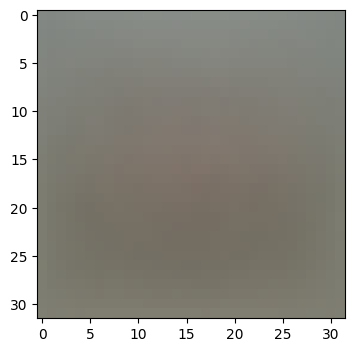

In [87]:
# Считаем среднее изображение по обучающей выборке svm_X_train
mean_image = np.mean(svm_X_train, axis=0)
plt.figure(figsize=(4, 4))
plt.imshow(mean_image.reshape((32, 32, 3)).astype('uint8')) 
plt.show()

In [88]:
# Из какждой выборки вычитаем среднее изображение
svm_X_train -= mean_image
svm_X_test -= mean_image
svm_X_val -= mean_image
svm_X_dev -= mean_image

2.3 Чтобы далее не учитывать смещение (свободный член b), добавьте дополнитульную размерность к массиву данных и заполните ее 1.

In [89]:
# Используя np.hstack добавляем справа столбец из единиц к каждой выборке
svm_X_train = np.hstack([svm_X_train, np.ones((svm_X_train.shape[0], 1))])
svm_X_test = np.hstack([svm_X_test, np.ones((svm_X_test.shape[0], 1))])
svm_X_val = np.hstack([svm_X_val, np.ones((svm_X_val.shape[0], 1))])
svm_X_dev = np.hstack([svm_X_dev, np.ones((svm_X_dev.shape[0], 1))])

print(svm_X_train.shape, svm_X_test.shape, svm_X_val.shape, svm_X_dev.shape)

(4900, 3073) (9000, 3073) (1000, 3073) (1000, 3073)


2.4 Реализуйте loss-функции в scripts/classifiers/linear_svm.py



In [90]:
from scripts.classifiers.linear_svm import svm_loss_naive
import time

W = np.random.randn(3073, 10) * 0.0001 

loss, grad = svm_loss_naive(W, svm_X_dev, svm_y_dev, 0.000005)
print('loss: %f' % (loss, ))

loss: 8.709947



2.5 Убедитесь, что вы верно реализовали расчет градиента, сравнив с реализацией численными методами (код приведен ниже).

In [91]:
print("Without reg")
from scripts.gradient_check import grad_check_sparse
loss, grad = svm_loss_naive(W, svm_X_dev, svm_y_dev, 0.0)
f = lambda w: svm_loss_naive(w, svm_X_dev, svm_y_dev, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad)

print("\nWith reg")
loss, grad = svm_loss_naive(W, svm_X_dev, svm_y_dev, 5e1)
f = lambda w: svm_loss_naive(w, svm_X_dev, svm_y_dev, 5e1)[0]
grad_numerical = grad_check_sparse(f, W, grad)

Without reg
numerical: 4.345607 analytic: 4.344623, relative error: 1.132107e-04
numerical: 9.153414 analytic: 9.143386, relative error: 5.480746e-04
numerical: -27.612293 analytic: -27.601843, relative error: 1.892742e-04
numerical: -6.273697 analytic: -6.273697, relative error: 2.135561e-11
numerical: -3.349267 analytic: -3.349267, relative error: 5.529982e-11
numerical: -13.792760 analytic: -13.792760, relative error: 6.523940e-12
numerical: 20.484213 analytic: 20.484213, relative error: 1.251415e-11
numerical: 16.328510 analytic: 16.328510, relative error: 2.027973e-11
numerical: 3.376837 analytic: 3.376837, relative error: 6.706005e-11
numerical: 14.911087 analytic: 14.911087, relative error: 2.205786e-11

With reg
numerical: -37.946099 analytic: -37.944315, relative error: 2.350621e-05
numerical: -14.445066 analytic: -14.443705, relative error: 4.710594e-05
numerical: -10.153864 analytic: -10.152949, relative error: 4.505770e-05
numerical: -28.474508 analytic: -28.471859, relativ

2.6 Сравните svm_loss_naive и svm_loss_vectorized реализации

In [92]:
from scripts.classifiers.linear_svm import svm_loss_vectorized

tic = time.time()
_, grad_naive = svm_loss_naive(W, svm_X_dev, svm_y_dev, 0.000005)
toc = time.time()
print('Naive loss and gradient: computed in %fs' % (toc - tic))

tic = time.time()
_, grad_vectorized = svm_loss_vectorized(W, svm_X_dev, svm_y_dev, 0.000005)
toc = time.time()
print('Vectorized loss and gradient: computed in %fs' % (toc - tic))

difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print('difference: %f' % difference)

Naive loss and gradient: computed in 0.181013s
Vectorized loss and gradient: computed in 0.036002s
difference: 0.000000


2.7 Реализуйте стохастический градиентный спуск в /classifiers/linear_classifier.py . Реализуйте методы train() и predict() и запустите следующий код

In [93]:
from scripts.classifiers import LinearSVM
svm = LinearSVM()
tic = time.time()
loss_hist = svm.train(svm_X_train, svm_y_train, learning_rate=1e-7, reg=2.5e4,
                      num_iters=1500, verbose=True)
toc = time.time()
print('That took %fs' % (toc - tic))

iteration 0 / 1500: loss 412.666479
iteration 100 / 1500: loss 242.820539
iteration 200 / 1500: loss 147.953333
iteration 300 / 1500: loss 90.544567
iteration 400 / 1500: loss 56.183209
iteration 500 / 1500: loss 35.414162
iteration 600 / 1500: loss 22.852820
iteration 700 / 1500: loss 15.788473
iteration 800 / 1500: loss 11.494543
iteration 900 / 1500: loss 8.407194
iteration 1000 / 1500: loss 6.543329
iteration 1100 / 1500: loss 6.148376
iteration 1200 / 1500: loss 4.860965
iteration 1300 / 1500: loss 4.826330
iteration 1400 / 1500: loss 4.895021
That took 9.229683s


In [94]:
svm_y_train_pred = svm.predict(svm_X_train)
print('training accuracy: %f' % (np.mean(svm_y_train == svm_y_train_pred), ))
svm_y_val_pred = svm.predict(svm_X_val)
print('validation accuracy: %f' % (np.mean(svm_y_val == svm_y_val_pred), ))

training accuracy: 0.429592
validation accuracy: 0.363000


2.8 С помощью кросс-валидации выберите значения параметров скорости обучения и регуляризации. В кросс-валидации используйте обучающую и валидационную выборки. Оцените accuracy на тестовой выборке.

In [95]:
learning_rates = [1e-7, 5e-5]
regularization_strengths = [2.5e4, 5e4]

result = []
for rate in learning_rates:
    for reg in regularization_strengths:
        result.append({"rate": rate, "reg": reg, "accur": cross_val(svm_X_train, svm_y_train, LinearSVM, dict(learning_rate=rate, reg=reg))})
        print(f'Посчитан результат для rate = {rate}, reg = {reg}. Точность составляет {result[-1]["accur"]}')
        
maxAccuracy = max(result, key=lambda x:x['accur'])
print(f"\nМаксимальная точность {maxAccuracy['accur']} была достигнута при rate = {maxAccuracy['rate']}, reg = {maxAccuracy['reg']}")        

Посчитан результат для rate = 1e-07, reg = 25000.0. Точность составляет 0.20816326530612245
Посчитан результат для rate = 1e-07, reg = 50000.0. Точность составляет 0.20612244897959184
Посчитан результат для rate = 5e-05, reg = 25000.0. Точность составляет 0.17551020408163265
Посчитан результат для rate = 5e-05, reg = 50000.0. Точность составляет 0.09081632653061225

Максимальная точность 0.20816326530612245 была достигнута при rate = 1e-07, reg = 25000.0


In [96]:
svm_classifier = LinearSVM()
svm_classifier.train(svm_X_train, svm_y_train, learning_rate=maxAccuracy['rate'], reg=maxAccuracy['reg'])

print(f"Оценка точности на тестовой выборке с rate = {maxAccuracy['rate']}, reg = {maxAccuracy['reg']}. " +  
      f'Полученная точность = {calculate_accuracy(svm_classifier.predict(svm_X_test), svm_y_test)}')

Оценка точности на тестовой выборке с rate = 1e-07, reg = 25000.0. Полученная точность = 0.21688888888888888


2.9 Сделайте выводы по второй части задания

Выбор регуляризации и точности обучения влияет на конечную точность модели

## 3.  Построение softmax-классификатора

3.1 Разделите данные на обучающую, тестовую и валидационную выборки. Преобразуйте каждое изображение в одномерный массив. Выведите размеры выборок.

In [97]:
# Разделяем данные на выборки
num_train = 4900
num_test = 9000
num_val = 1000

softmax_X_train = X_train[range(num_train)]
softmax_y_train = y_train[range(num_train)]

softmax_X_test = X_test[range(num_test)]
softmax_y_test = y_test[range(num_test)]

softmax_X_val = X_train[range(num_train, num_train + num_val)]
softmax_y_val = y_train[range(num_train, num_train + num_val)]

softmax_X_dev = X_test[range(num_test, num_test + num_val)]
softmax_y_dev = y_test[range(num_test, num_test + num_val)]

In [98]:
# Переводим выборки в одномерный массив
softmax_X_train = np.reshape(softmax_X_train, (softmax_X_train.shape[0], -1)).astype(np.float64)
softmax_y_train = np.reshape(softmax_y_train, (softmax_y_train.shape[0],))

softmax_X_test = np.reshape(softmax_X_test, (softmax_X_test.shape[0], -1)).astype(np.float64)
softmax_y_test = np.reshape(softmax_y_test, (softmax_y_test.shape[0],))

softmax_X_val = np.reshape(softmax_X_val, (softmax_X_val.shape[0], -1)).astype(np.float64)
softmax_y_val = np.reshape(softmax_y_val, (softmax_y_val.shape[0],))

softmax_X_dev = np.reshape(softmax_X_dev, (softmax_X_dev.shape[0], -1)).astype(np.float64)
softmax_y_dev = np.reshape(softmax_y_dev, (softmax_y_dev.shape[0],))

In [99]:
# Выводим размеры
print('Training data shape: ', softmax_X_train.shape)
print('Training labels shape: ', softmax_y_train.shape)
print('Test data shape: ', softmax_X_test.shape)
print('Test labels shape: ', softmax_y_test.shape)
print('Validation data shape: ', softmax_X_val.shape)
print('Validation labels shape: ', softmax_y_val.shape)
print('Development data shape: ', softmax_X_dev.shape)
print('Development labels shape: ', softmax_y_dev.shape)

Training data shape:  (4900, 3072)
Training labels shape:  (4900,)
Test data shape:  (9000, 3072)
Test labels shape:  (9000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Development data shape:  (1000, 3072)
Development labels shape:  (1000,)


3.2 Проведите предварительную обработку данных, путем вычитания среднего изображения, рассчитанного  по обучающей выборке.

[131.39897959 136.3122449  132.67163265 130.74959184 135.70265306
 132.03673469 131.63612245 136.45979592 132.66346939 132.68367347]


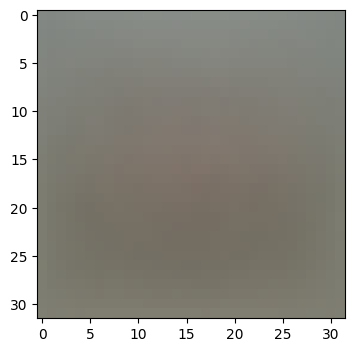

In [100]:
# Считаем среднее изображение по обучающей выборке svm_X_train
mean_image = np.mean(softmax_X_train, axis=0)
print(mean_image[:10]) 
plt.figure(figsize=(4,4))
plt.imshow(mean_image.reshape((32,32,3)).astype('uint8')) 
plt.show()

In [101]:
# Из какждой выборки вычитаем среднее изображение
softmax_X_train -= mean_image
softmax_X_test -= mean_image
softmax_X_val -= mean_image
softmax_X_dev -= mean_image

3.3 Чтобы далее не учитывать смещение (свободный член b), добавьте дополнитульную размерность к массиву данных и заполните ее единицами.

In [102]:
# Используя np.hstack добавляем справа столбец из единиц к каждой выборке
softmax_X_train = np.hstack([softmax_X_train, np.ones((softmax_X_train.shape[0], 1))])
softmax_X_test = np.hstack([softmax_X_test, np.ones((softmax_X_test.shape[0], 1))])
softmax_X_val = np.hstack([softmax_X_val, np.ones((softmax_X_val.shape[0], 1))])
softmax_X_dev = np.hstack([softmax_X_dev, np.ones((softmax_X_dev.shape[0], 1))])

print(softmax_X_train.shape, softmax_X_test.shape, softmax_X_val.shape, softmax_X_dev.shape)

(4900, 3073) (9000, 3073) (1000, 3073) (1000, 3073)


3.4 Реализуйте функции в classifiers/softmax.py




In [103]:
from scripts.classifiers.softmax import softmax_loss_naive
import time

# Generate a random softmax weight matrix and use it to compute the loss.
W = np.random.randn(3073, 10) * 0.0001
loss, grad = softmax_loss_naive(W, softmax_X_dev, softmax_y_dev, 0.0)

# As a rough sanity check, our loss should be something close to -log(0.1).
print('loss: %f' % loss)
print('sanity check: %f' % (-np.log(0.1)))

loss: 8.828764
sanity check: 2.302585


3.5 Убедитесь, что вы верно реализовали расчет градиента, сравнив с реализацией численными методами (код приведен ниже).

In [104]:
print("Without reg")
loss, grad = softmax_loss_naive(W, softmax_X_dev, softmax_y_dev, 0.0)
from scripts.gradient_check import grad_check_sparse
f = lambda w: softmax_loss_naive(w, softmax_X_dev, softmax_y_dev, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)


print("\nWith reg")
loss, grad = softmax_loss_naive(W, softmax_X_dev, softmax_y_dev, 5e1)
f = lambda w: softmax_loss_naive(w, softmax_X_dev, softmax_y_dev, 5e1)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)

Without reg
numerical: -12.490959 analytic: -12.490959, relative error: 3.814792e-11
numerical: -1.622612 analytic: -1.622612, relative error: 3.907374e-10
numerical: -7.414705 analytic: -7.414705, relative error: 7.014612e-11
numerical: -30.008354 analytic: -30.008354, relative error: 1.796267e-11
numerical: 19.931633 analytic: 19.931633, relative error: 4.521986e-12
numerical: -19.820957 analytic: -19.820957, relative error: 4.458960e-12
numerical: 8.751063 analytic: 8.751063, relative error: 1.431133e-11
numerical: 26.803008 analytic: 26.803008, relative error: 1.288238e-11
numerical: 6.028308 analytic: 6.028308, relative error: 1.005308e-11
numerical: -17.671985 analytic: -17.671985, relative error: 1.661164e-11

With reg
numerical: -5.065350 analytic: -5.063492, relative error: 1.834969e-04
numerical: -29.641321 analytic: -29.649943, relative error: 1.454083e-04
numerical: 14.450761 analytic: 14.451402, relative error: 2.217837e-05
numerical: -6.036973 analytic: -6.038903, relativ

3.6 Сравните softmax_loss_naive и softmax_loss_vectorized реализации

In [105]:
tic = time.time()
loss_naive, grad_naive = softmax_loss_naive(W, softmax_X_dev, softmax_y_dev, 0.000005)
toc = time.time()
print('naive loss: %e computed in %fs' % (loss_naive, toc - tic))

from scripts.classifiers.softmax import softmax_loss_vectorized
tic = time.time()
loss_vectorized, grad_vectorized = softmax_loss_vectorized(W, softmax_X_dev, softmax_y_dev, 0.000005)
toc = time.time()
print('vectorized loss: %e computed in %fs' % (loss_vectorized, toc - tic))


grad_difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print('Loss difference: %f' % np.abs(loss_naive - loss_vectorized))
print('Gradient difference: %f' % grad_difference)

naive loss: 8.828764e+00 computed in 0.152009s
vectorized loss: 8.828764e+00 computed in 0.016004s
Loss difference: 0.000000
Gradient difference: 0.000000


3.7 Реализуйте стохастический градиентный спуск в /classifiers/linear_classifier.py . Реализуйте методы train() и predict() и запустите следующий код

In [106]:
from scripts.classifiers import Softmax
softmax = Softmax()
tic = time.time()
loss_hist = softmax.train(softmax_X_train, softmax_y_train, learning_rate=1e-7, reg=2.5e4,
                      num_iters=1500, verbose=True)
toc = time.time()
print('That took %fs' % (toc - tic))

iteration 0 / 1500: loss 408.479338
iteration 100 / 1500: loss 239.894121
iteration 200 / 1500: loss 146.474437
iteration 300 / 1500: loss 89.920040
iteration 400 / 1500: loss 56.748842
iteration 500 / 1500: loss 34.898764
iteration 600 / 1500: loss 23.216588
iteration 700 / 1500: loss 15.710681
iteration 800 / 1500: loss 11.293662
iteration 900 / 1500: loss 8.947340
iteration 1000 / 1500: loss 6.978340
iteration 1100 / 1500: loss 5.433229
iteration 1200 / 1500: loss 5.685479
iteration 1300 / 1500: loss 5.197434
iteration 1400 / 1500: loss 5.090075
That took 9.349698s


3.8 Обучите Softmax-классификатор и оцените accuracy на тестовой выборке.

In [107]:
softmax_y_train_pred = softmax.predict(softmax_X_train)
print(f'training accuracy: {calculate_accuracy(softmax_y_train_pred, softmax_y_train)}')
softmax_y_val_pred = softmax.predict(softmax_X_val)
print(f'validation accuracy: {calculate_accuracy(softmax_y_val_pred, softmax_y_val)}')

training accuracy: 0.4353061224489796
validation accuracy: 0.366


3.9 С помощью кросс-валидации выберите значения параметров скорости обучения и регуляризации. В кросс-валидации используйте обучающую и валидационную выборки. Оцените accuracy на тестовой выборке.

In [108]:
learning_rates = [1e-7, 5e-5]
regularization_strengths = [2.5e4, 5e4]

result = []
for rate in learning_rates:
    for reg in regularization_strengths:
        result.append({"rate": rate, "reg": reg, "accur": cross_val(softmax_X_train, softmax_y_train, Softmax, dict(learning_rate=rate, reg=reg))})
        print(f'Посчитан результат для rate = {rate}, reg = {reg}. Точность составляет {result[-1]["accur"]}')
        
maxAccuracy = max(result, key=lambda x:x['accur'])
print(f"\nМаксимальная точность {maxAccuracy['accur']} была достигнута при rate = {maxAccuracy['rate']}, reg = {maxAccuracy['reg']}") 

Посчитан результат для rate = 1e-07, reg = 25000.0. Точность составляет 0.20918367346938777
Посчитан результат для rate = 1e-07, reg = 50000.0. Точность составляет 0.21122448979591837
Посчитан результат для rate = 5e-05, reg = 25000.0. Точность составляет 0.19387755102040816
Посчитан результат для rate = 5e-05, reg = 50000.0. Точность составляет 0.11428571428571428

Максимальная точность 0.21122448979591837 была достигнута при rate = 1e-07, reg = 50000.0


In [109]:
softmax_classifier = Softmax()
softmax_classifier.train(softmax_X_train, softmax_y_train, learning_rate=maxAccuracy['rate'], reg=maxAccuracy['reg'])

print(f"Оценка точности на тестовой выборке с rate = {maxAccuracy['rate']}, reg = {maxAccuracy['reg']}. " +  
      f'Полученная точность = {calculate_accuracy(softmax_classifier.predict(softmax_X_test), softmax_y_test)}')

Оценка точности на тестовой выборке с rate = 1e-07, reg = 50000.0. Полученная точность = 0.2328888888888889


3.10 Сделайте выводы по третьей части задания

1. В зависимости от подобранных параметров точность Softmax различается.
2. Точность Softmax хуже, чем у SVM.